In [12]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import openpyxl
from scipy import stats

# File to Load
state_and_county_variables_values = Path("/Users/kelcigriffin/Project1/FoodEnvironmentAtlas/StateAndCountyData.csv")
Population_Data = Path("/Users/kelcigriffin/Project1/FoodEnvironmentAtlas/SupplementalDataCounty.csv")
environmental_atlas = Path("/Users/kelcigriffin/Project1/FoodEnvironmentAtlas/FoodEnvironmentAtlas.xls")
# Read the modified state_and_county csv and store into Pandas DataFrame
Population_Data_df = pd.read_csv(Population_Data, encoding="utf-8")
state_and_county_df = pd.read_csv(state_and_county_variables_values, encoding="utf-8")
state_and_county_df.head()
health_data = "HEALTH"
environmental_atlas_df = pd.read_excel(environmental_atlas, "STORES")
environmental_atlas_df2 = pd.read_excel(environmental_atlas, "SOCIOECONOMIC")
environmental_atlas_df3 = pd.read_excel(environmental_atlas, "RESTAURANTS")

# combine dataframes using "State" and "County" as common identifiers
combined_df = pd.merge(environmental_atlas_df, environmental_atlas_df2, on=["State", "County"])
combined_df = pd.merge(combined_df, environmental_atlas_df3, on=["State", "County"])

# Now, combined_df contains data from both sheets with a common "State" and "County"
# You can access the columns from both sheets as needed
georgia_county_filter = combined_df['State']== 'GA'

GAcounties = combined_df.loc[georgia_county_filter, ["State", "County", "FFR16", "GROC16", "CONVS16", "POVRATE15"]]

GAcounties


,State,County,FFR16,GROC16,CONVS16,POVRATE15
387,GA,Appling,15,2,14,22.5
388,GA,Atkinson,5,2,7,26.9
389,GA,Bacon,7,2,12,23.9
390,GA,Baker,0,1,0,28.7
391,GA,Baldwin,41,7,37,26.0
...,...,...,...,...,...,...
541,GA,Whitfield,80,24,72,15.3
542,GA,Wilcox,1,0,8,30.4
543,GA,Wilkes,5,3,8,22.9
544,GA,Wilkinson,2,3,13,20.9


In [14]:
# Rename the columns
col = {
    "FFR16": "Fast Food Restaurants",
    "GROC16": "Grocery Stores",
    "CONVS16": "Convenience Stores",
    "POVRATE15": "2015 Poverty Rate"
}

GAcounties.rename(columns=col, inplace=True)
# Reset the index (assuming you want to drop the default index column)
GAcounties.reset_index(drop=True, inplace=True)

# Print the DataFrame with the new column names
GAcounties

,State,County,Fast Food Restaurants,Grocery Stores,Convenience Stores,2015 Poverty Rate
0,GA,Appling,15,2,14,22.5
1,GA,Atkinson,5,2,7,26.9
2,GA,Bacon,7,2,12,23.9
3,GA,Baker,0,1,0,28.7
4,GA,Baldwin,41,7,37,26.0
...,...,...,...,...,...,...
154,GA,Whitfield,80,24,72,15.3
155,GA,Wilcox,1,0,8,30.4
156,GA,Wilkes,5,3,8,22.9
157,GA,Wilkinson,2,3,13,20.9


In [18]:
# Sort the DataFrame based on the "Diabetes_Adults_2017" column in descending order
GAcounties_sorted = GAcounties.sort_values(by="2015 Poverty Rate", ascending=False)

# Get the top 5 counties with the highest values
top_5_counties = GAcounties_sorted.head(5)

# Get the bottom 5 counties with the lowest values
bottom_5_counties = GAcounties_sorted.tail(5)
# Reset the index (assuming you want to drop the default index column)
top_5_counties.reset_index(drop=True, inplace=True)
bottom_5_counties.reset_index(drop=True, inplace=True)
# Print the top and bottom 5 counties
print("5 Highest Poverty Rate Counties: Grocery Stores vs Convenience Stores & Fast Food Restaurants")
top_5_counties

5 Highest Poverty Rate Counties: Grocery Stores vs Convenience Stores & Fast Food Restaurants


,State,County,Fast Food Restaurants,Grocery Stores,Convenience Stores,2015 Poverty Rate
0,GA,Stewart,0,1,7,42.0
1,GA,Wheeler,1,1,5,39.3
2,GA,Clarke,114,23,67,38.1
3,GA,Calhoun,2,1,5,37.5
4,GA,Terrell,5,6,9,36.5


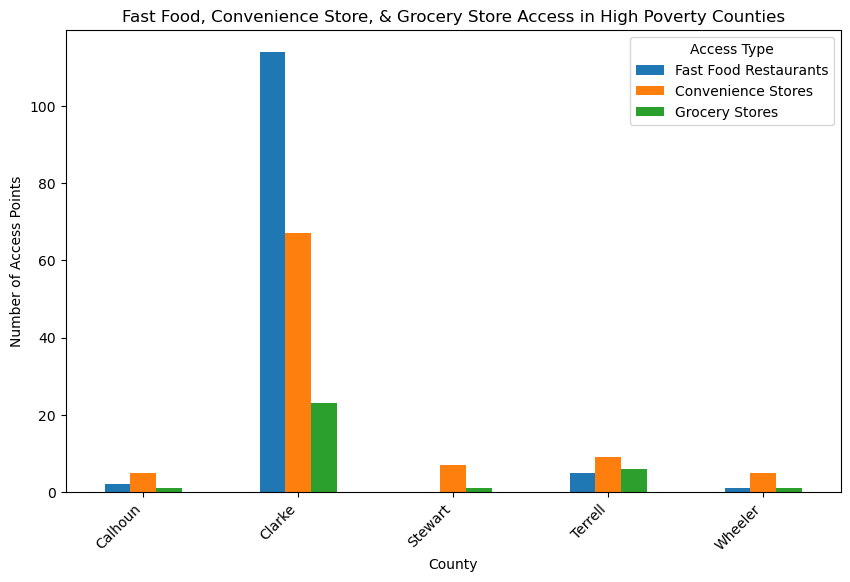

In [17]:
# Group the data by county
grouped_data = top_5_counties.groupby('County')[['Fast Food Restaurants', 'Convenience Stores', 'Grocery Stores']].sum()

# Plot the grouped bar chart
ax = grouped_data.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Number of Access Points')
ax.set_xlabel('County')
ax.set_title('Fast Food, Convenience Store, & Grocery Store Access in High Poverty Counties')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Access Type', loc='upper right')
plt.show()

In [19]:
print("\n5 Lowest Poverty Rate Counties: Grocery Stores vs Convenience Stores & Fast Food Restaurants")
bottom_5_counties


5 Lowest Poverty Rate Counties: Grocery Stores vs Convenience Stores & Fast Food Restaurants


,State,County,Fast Food Restaurants,Grocery Stores,Convenience Stores,2015 Poverty Rate
0,GA,Columbia,89,22,38,9.3
1,GA,Paulding,64,12,51,8.8
2,GA,Fayette,102,18,42,7.0
3,GA,Oconee,36,4,14,6.8
4,GA,Forsyth,144,36,69,6.3


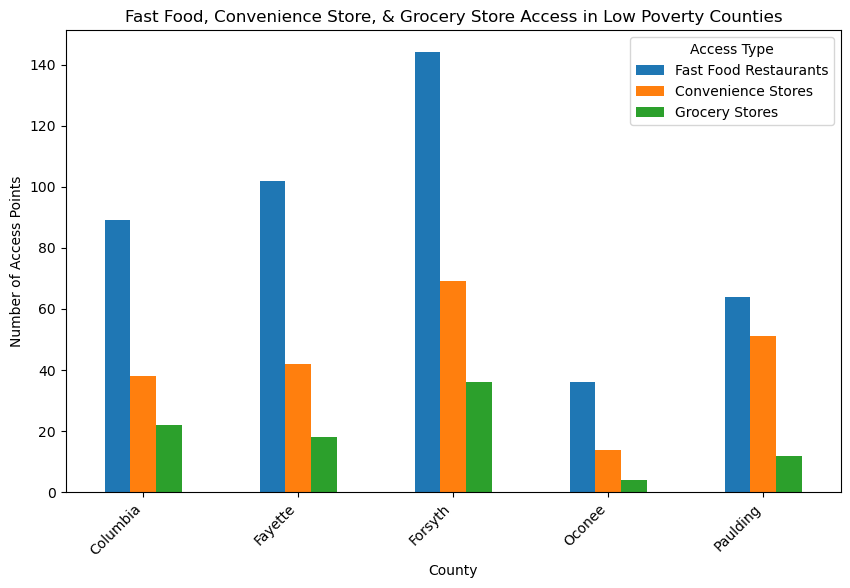

In [21]:
# Group the data by county
grouped_data = bottom_5_counties.groupby('County')[['Fast Food Restaurants', 'Convenience Stores', 'Grocery Stores']].sum()

# Plot the grouped bar chart
ax = grouped_data.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Number of Access Points')
ax.set_xlabel('County')
ax.set_title('Fast Food, Convenience Store, & Grocery Store Access in Low Poverty Counties')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Access Type', loc='upper right')
plt.show()